# Text Extraction from the Image using Pytesseract

# Load the libraries

In [484]:
import cv2
import pytesseract
import os
import matplotlib.pyplot as plt

In [485]:
path = os.getcwd()
exe_path = os.path.join(os.path.join(path ,'Tesseract-OCR'), 'tesseract.exe')
pytesseract.pytesseract.tesseract_cmd = exe_path

# Read the Image as Gray Scale Image

In [486]:
img= cv2.imread('./Data/Guided_project1.png',cv2.IMREAD_GRAYSCALE)

# Display the Image

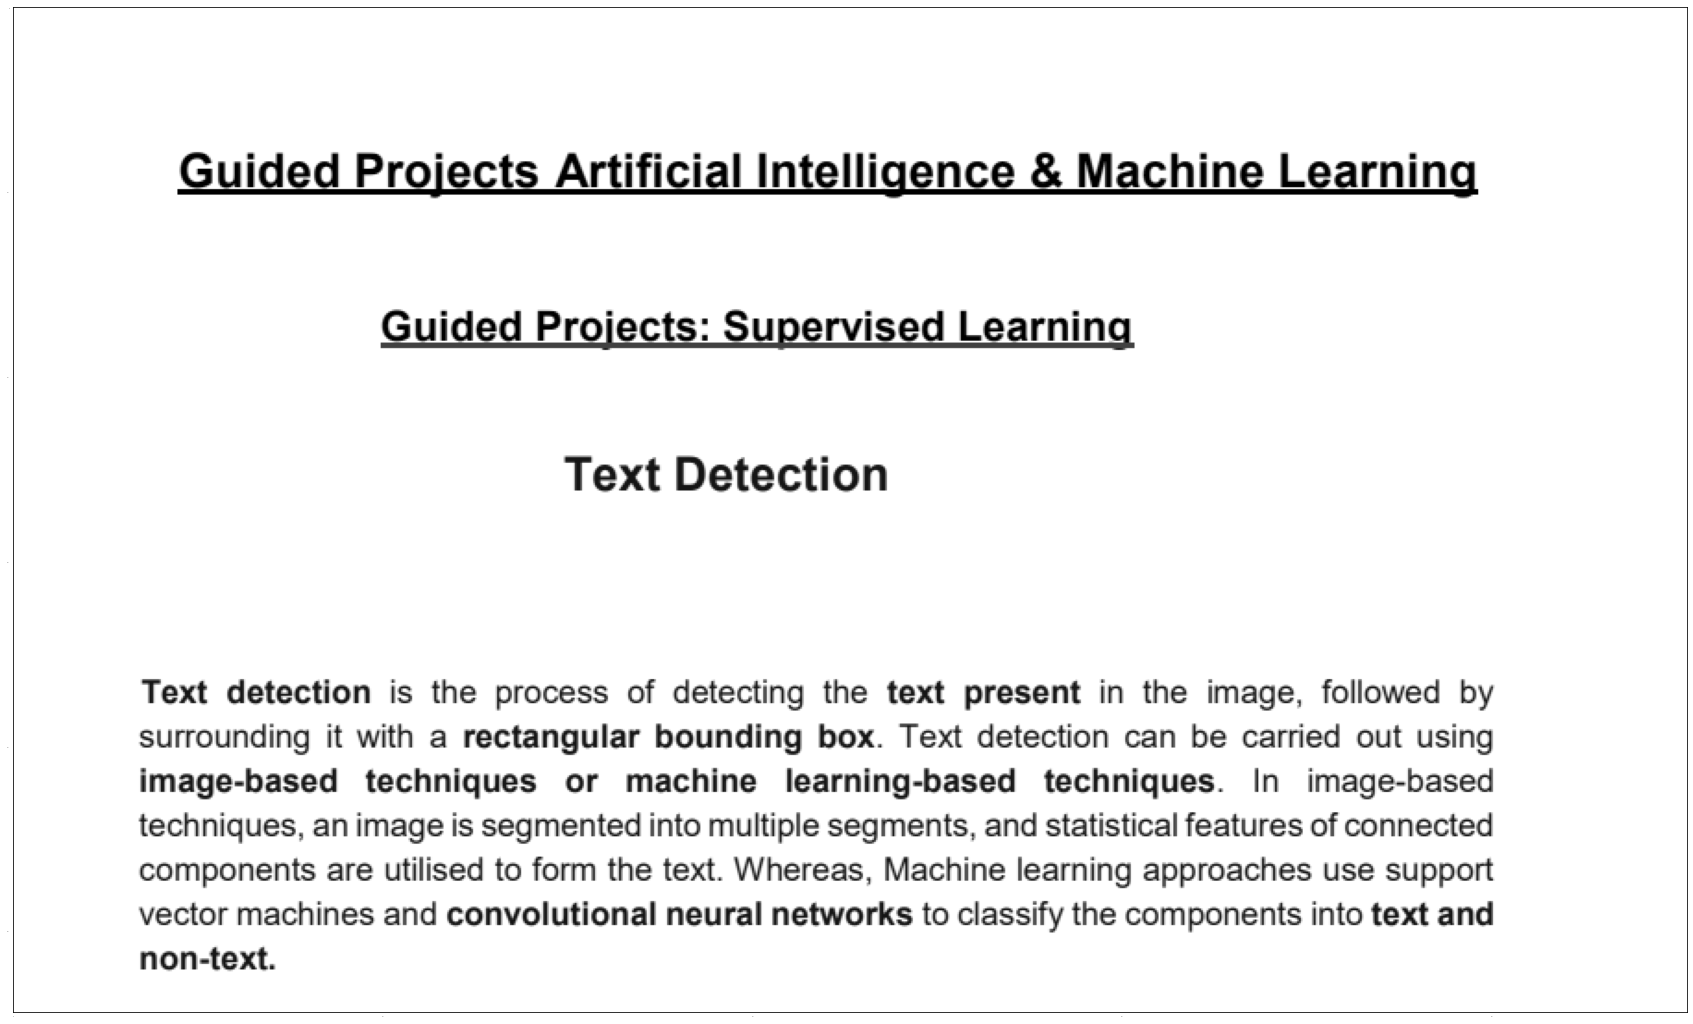

In [487]:
plt.figure(figsize = (30,30))
plt.imshow(img,"gray")
plt.tick_params(axis='both', labelsize=0, length = 0)
plt.show()

# Extract Text from Image without preprocessing

In [488]:
text = pytesseract.image_to_string(img,lang='eng')
print(text)

 

Guided Pro'ects: Supervised Learning

Text Detection

Text detection is the process of detecting the text present in the image, iollowed by
surrounding it with a rectangular bounding box. Text detection can be carried out using
Image-based techniques or machine learning-based techniques. In image-based
techniques, an image is segmented into multiple segments‘ and statistical leatures of connected
ccrnpcnenls are utilised to term the text. Whereas, Machine learning approaches use support
vector machines and corlvolutional neural networks to ciassify the components into text and
non-text.




# Function to resize based on the aspect ratio

In [489]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized


# Functions for Image Proprocessing

In [490]:
import numpy as np

#Thick the text in the image
def thick_font(image):
    #image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations = 1)
    return (image)

#Thin the text in the image
def thin_font(image):
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image,kernel,iterations = 1)
    return (image)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#Image Binarization
def binary_image(image, min_threshold = 147, max_threshold= 255):
    thresh,img = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)
    return img


# Function to represent contours that represent the textual area

In [491]:
def find_text_contours(image):
    thresh,image = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY)
    contours,hierarchy = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:30]
    cnt = contours[0]
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(image,[box],0,(0,0,255),30)
    return image

# Resize the image

In [492]:
print("Before resizing:", img.shape)
img = image_resize(img,height=700)
print("After resizing:", img.shape)

Before resizing: (544, 906)
After resizing: (700, 1165)


# Convert into binary image

In [493]:
img = binary_image(img, 110, 255)

# Display Contours

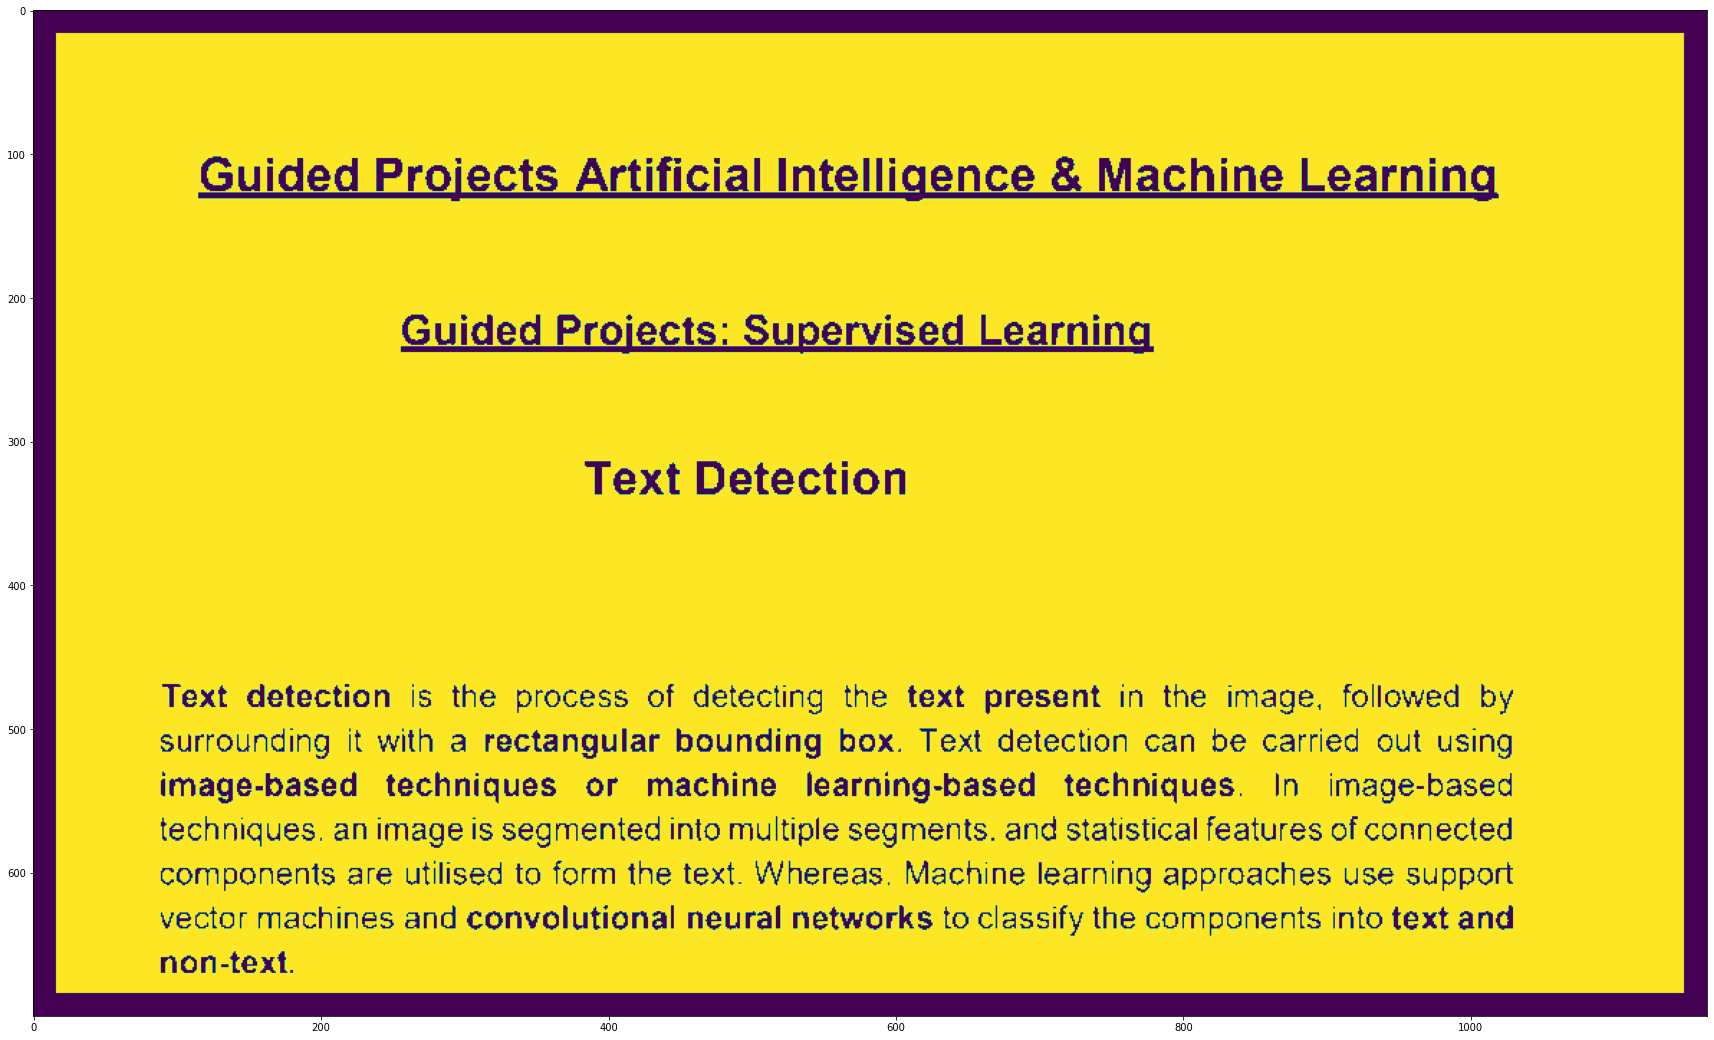

In [494]:
contour_img = find_text_contours(img)
plt.figure(figsize = (30,30))
plt.imshow(contour_img)
plt.show()

# Read the text from the Image

In [495]:
custom_config = r'--oem 3 --psm 11'
text = pytesseract.image_to_string(img,lang='eng', config=custom_config)
print(text)

Guided Proiects Artificial Intelligence & Machine Learning

Guided Projects: Supervised Learning

Text Detection

Text detection is the process of detecting the text present in the image‘ followed by
surrounding it with a rectangular bounding box. Text detection can be carried out using
image-based techniques or machine learning-based techniques In image-based
techniques an image is segmented into multiple segments. and statistical features of connected
components are utilised to form the text Whereas Machine learning approaches use support
vector machines and convolutional neural networks to classify the components into text and
non-text.


